In [86]:
import math

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import math

Hugo Allan García Monterrosa

Número de Matrícula 520462250


# Problema 1
## A. Polinomio con mejor ajuste.
Para encontrar el polinomio con mejor ajuste vamos a proceder a hacer 50 modelos
polinomiales y usaremos como medida de ajuste el Residual Squared Sum (RSS) dado por

$$ RSS = \sum_{i=1} (y_i - f(x_i))^2$$

El RSS es una buena medida de ajuste, ya que mide que tanto se alejan los datos observados
de las predicciones realizadas por el modelo.

<AxesSubplot:>

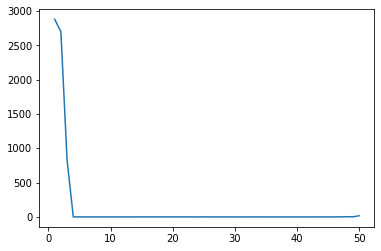

In [113]:
#Lectura del archivo CSV con los datos
datos_p1 = pd.read_csv("../data/problem1.csv")
max_pol_degree = 50
rss = []
X_train, y_train, X_test, y_test = datos_p1["X_training"],\
                   datos_p1["Y_training"],\
                    datos_p1["X_test"],\
                    datos_p1["Y_test"]

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
validaciones_cruzadas = []
for i in range(1,max_pol_degree+1):
    poly = PolynomialFeatures(i, include_bias=True)
    poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
    poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
    polyreg = LinearRegression()
    polyreg.fit(poly_features,y_train)
    rss.append( np.sum(np.square( y_train - polyreg.predict( poly_features ) )))
    validaciones_cruzadas.append(np.mean(cross_val_score(polyreg, poly_features_test, y_test, cv=5)))

#Haciendo gráfica de los resultados de RSS
sb.lineplot(x = range(1, max_pol_degree+1), y = rss)

In [80]:
#Imprimiendo el grado del polinomio con mejor ajuste
print("El polinomio con el mejor ajuste es el de grado {}".format(np.argmin(rss) + 1))


El polinomio con el mejor ajuste es el de grado 38


## B. Criterio AIC.
Calcularemos el AIC corregido utilizando las fórmulas
 $$ AIC = 2k -2\log(L) $$
 $$ AICc = AIC + \frac{2k(k+1)}{n-k-1} $$
 donde $k$ es el número de variables independientes en el modelo y $L$ es la medida de verosimulitud
 utilizada en el modelo, en este caso el MSS. Con esto calculamos los AIC y los graficamos, como
 sigue:

In [84]:
AIC = []
n = len(X_train)
for i in range(1, max_pol_degree +1):
    AIC.append( 2*(i+1) - 2*np.log10(rss[i-1] / n ) + (2*(i+1)*(i+2)) / ( n - i -2) )

[1.3348948821380149, 3.391113244144591, 6.420856189242491, 14.059867117661971, 16.059901081433786, 18.059914987038166, 20.060189426753176, 22.06520498841465, 24.066689817508202, 26.07029909149514, 28.07847036832469, 30.080301618326413, 32.08840702143433, 34.10857123061721, 36.11045196682129, 38.119386626789, 40.119431822430116, 42.12512587093608, 44.126727120270736, 46.126821782863466, 48.127255373636785, 50.12750584720219, 52.16519210355438, 54.16874039906295, 56.20057836623212, 58.19856999479959, 60.20107264866309, 62.176593321982004, 64.20628345832547, 66.22660680292266, 68.2316959476213, 70.22265396818356, 72.21703494316823, 74.14895995240545, 76.23344484312106, 78.25245475268946, 80.25588499395869, 82.27410216332423, 84.27407269346206, 86.27184655966009, 88.2286890686655, 90.24457730334535, 92.21551715604035, 94.20207051940355, 96.18699902924565, 98.12897684468236, 100.07197945472052, 101.05465748591594, 103.62029973319237, 103.7599151749636]


0


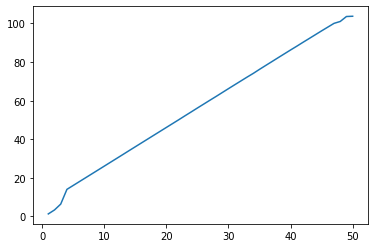

In [85]:
sb.lineplot(x = range(1, max_pol_degree+1), y = AIC)

De la gráfica podemos observar que, siguiendo el criterio de minimización de AIC, deberíamos elegir el polinomio
lineal.


## C. Validación Cruzada
Ahora haremos validación cruzado con $k=5$ para encontrar el modelo que hace mejores predicciones. En este caso
el mejor modelo será el que tenga el score más alto. 

[-17.380654173799105, 0.34588815807382983, 0.9984229305237502, 0.9152575552482171, 0.5403189464783656, 0.9560365076062369, -11.644916788900048, -316.57702479360285, -7763.134748324201, -5355.500529212967, -3587.7713508525985, -2347.686611408519, -1516.5689246997092, -979.0590163821835, -160.67055604005833, -368.8983880728205, -732.3081143699834, -1347.9753060021696, -2433.4434272692074, -4316.656477234099, -7522.326746216716, -12867.328274388414, -21603.499164440746, -35641.24609371644, -57826.86421017222, -92453.97596043505, -145732.30595155543, -226785.93373523388, -348529.4680111439, -529789.5676278444, -796104.1851852575, -1184216.7635974067, -1743150.3539805454, -2540504.1618811195, -3667051.8863131115, -5241703.516326347, -7422995.746823114, -10412929.900654059, -14476652.081948575, -19954133.728986464, -27258311.4274531, -36966859.88814646, -49753059.934483185, -967831.6771063259, -963612.1400689023, -732263.3488337577, -279197.2509914401, -16392.653531833308, -1549833.067390938

<AxesSubplot:>

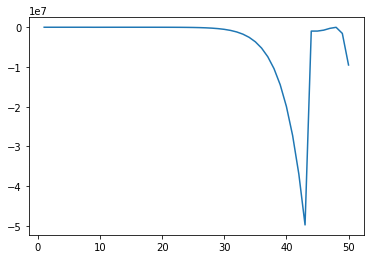

In [115]:
print(validaciones_cruzadas)
sb.lineplot(x = range(1, max_pol_degree+1), y = validaciones_cruzadas)

In [127]:
print("El mejor polinomio según la validación cruzada {}".format(np.argmax(validaciones_cruzadas) + 1))

El mejor polinomio según la validación cruzada 3


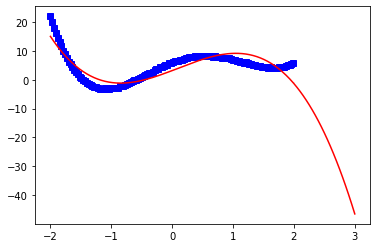

In [125]:
poly = PolynomialFeatures(3, include_bias=True)
poly_features = poly.fit_transform(np.array(X_train).reshape(-1, 1))
poly_features_test = poly.fit_transform(np.array(X_test).reshape(-1, 1))
polyreg = LinearRegression()
polyreg.fit(poly_features,y_train)
plt.plot(X_train, y_train, 'bs', label = "Datos de entrenamiento")
plt.plot(X_train, polyreg.predict(poly_features), 'r', label = 'Valores predecidos')
plt.plot(X_test, polyreg.predict(poly_features_test), 'r', label = 'Valores predecidos')

De los calculos vemos que el modelo que presenta mejor rendimiento en la validación cruzada 
es el modelo cúbico. 

